# EDA for Senior Thesis - Trees of Rostock

## Dependencies

In [1]:
import pandas as pd
import math
import time
import os
import matplotlib.pyplot as plt
import numpy as np

## Variables

In [ ]:
path = '../data/data_gov_de/trees/baeume.csv'

recoded_column_names = {
    'gattung_botanisch' : 'botanical_genus'     ,
    'gattung_deutsch'   : 'German_genus'        ,
    'art_botanisch'     : 'botanical_species'   ,
    'art_deutsch'       : 'German-species'      ,
    'alleebaum'         : 'avenue_tree'         ,
    'hoehe'             : 'height'              ,
    'stammdurchmesser'  : 'trunk_diameter'      ,
    'stammumfang'       : 'trunk_circumference' ,
    'kronendurchmesser' : 'crown_diameter'      ,
    'baumpatenschaft'   : 'tree_sponsorship'    ,
    }

## Inspect Data

### Load Data

In [3]:
df = pd.read_csv(path,encoding='utf-8')
df

,latitude,longitude,uuid,gattung_botanisch,gattung_deutsch,art_botanisch,art_deutsch,alleebaum,hoehe,stammdurchmesser,stammumfang,kronendurchmesser,baumpatenschaft
0,54.063670,12.116493,fa3c43ce-8e5f-46e6-ac9d-aa950bf0f4a9,Acer,Ahorn,Acer species,Ahorn,0,10.0,20.37,64.00,5.0,0
1,54.146583,12.048973,1140029d-8c75-47c4-ace0-19ac0ed66410,Acer,Ahorn,Acer species,Ahorn,0,14.0,42.65,134.00,10.0,0
2,54.146556,12.049125,67e8b1df-0c5a-48b8-bd86-a8b5c126f6e3,Acer,Ahorn,Acer species,Ahorn,0,12.0,28.97,91.00,7.0,0
3,54.146420,12.048190,b3663402-c4c7-49f0-9c9e-79f01f5c378a,Acer,Ahorn,Acer species,Ahorn,0,9.0,37.24,117.00,9.0,0
4,54.146266,12.047498,09981ce2-fcc4-48c7-a390-8c2135071f00,Prunus,Kirsche,Prunus species,Kirsche,0,8.0,32.79,103.00,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70601,54.086170,12.091787,97c54563-ba82-458f-aab3-0916e99233ed,Tilia,Linde,Tilia tomentosa „Brabant“,Silber-Linde „Brabant“,0,2.0,11.14,35.00,1.0,0
70602,54.086893,12.144807,c6aa997b-17b5-4ac0-a29f-f2745997c654,Salix,Weide,Salix alba „Tristis“,Trauer-Weide „Tristis“,0,8.0,17.00,53.41,5.0,0
70603,54.081667,12.113408,50cfdee3-d244-4026-a7d0-99a93bf18e6c,Prunus,Kirsche,Prunus padus „Schloss Tiefurt“,Trauben-Kirsche „Schloss Tiefurt“,0,7.0,14.32,45.00,1.0,0
70604,54.081649,12.113480,8323b378-921b-42a4-a40d-586b23d23897,Prunus,Kirsche,Prunus padus „Schloss Tiefurt“,Trauben-Kirsche „Schloss Tiefurt“,0,6.0,7.96,25.00,1.0,0


### Update the column names to English from German.


In [4]:
for i in df.columns: print(i)

latitude
longitude
uuid
gattung_botanisch
gattung_deutsch
art_botanisch
art_deutsch
alleebaum
hoehe
stammdurchmesser
stammumfang
kronendurchmesser
baumpatenschaft


### Used Google Translate to reencocde variable names:
| original variable name | translated variable name |
| --- |--- |
| gattung_botanisch  | botanical genus     |
| gattung_deutsch    | German genus        |
| art_botanisch      | botanical species   |
| art_deutsch        | German species      |
| alleebaum          | avenue tree         |
| hoehe              | height              |
| stammdurchmesser   | trunk diameter      |
| stammumfang        | trunk circumference |
| kronendurchmesser  | crown diameter      |
| baumpatenschaft    | tree sponsorship    |

In [5]:
df = df.rename(columns=recoded_column_names)
for i in df.columns: print(i)

latitude
longitude
uuid
botanical_genus
German_genus
botanical_species
German-species
avenue_tree
height
trunk_diameter
trunk_circumference
crown_diameter
tree_sponsorship


### Review Stats for raw data:
- Are there misssing values?

In [6]:
df.describe()

,latitude,longitude,avenue_tree,height,trunk_diameter,trunk_circumference,crown_diameter,tree_sponsorship
count,70901.000000,70901.000000,70901.000000,69486.000000,69378.000000,69378.000000,69393.000000,70901.000000
mean,54.113202,12.106738,0.174469,12.407147,32.804386,103.058039,6.422328,0.002172
std,0.036345,0.044526,0.379515,8.370137,26.152694,82.161219,3.770057,0.046555
min,54.004862,12.006991,0.000000,0.400000,0.050000,0.160000,0.100000,0.000000
25%,54.082481,12.071525,0.000000,7.000000,17.000000,53.410000,4.000000,0.000000
50%,54.104562,12.096546,0.000000,11.000000,28.010000,88.000000,6.000000,0.000000
75%,54.139616,12.139764,0.000000,16.000000,43.000000,135.090000,8.100000,0.000000
max,54.252528,12.347259,1.000000,915.000000,2588.000000,8130.440000,164.000000,1.000000


### What are the unique species and genuses in this data set?

In [7]:
print(f'Unique botanical genus in this data set: {len(df.botanical_genus.unique())}')
print(f'Unique botanical species in this data set: {len(df.botanical_species.unique())}')

Unique botanical genus in this data set: 85
Unique botanical species in this data set: 480


### Examine Genus and Species

In [8]:
for i in df.botanical_genus.unique(): print(i)
print()
for i in df.botanical_species.unique(): print(i)

Acer
Quercus
Gruppenbäume
Tilia
Betula
Sorbus
Alnus
Fraxinus
Salix
Pinus
Prunus
Malus
Populus
Aesculus
Sophora
Fagus
Cercis
Taxus
Species
Crataegus
Ilex
Robinia
Picea
Carpinus
Ostrya
Thuja
Platanus
Pyrus
Juglans
Ailanthus
Abies
Larix
Ulmus
Corylus
Gleditsia
Metasequoia
Juniperus
Castanea
Morus
Liriodendron
Cornus
Amelanchier
Chamaecyparis
Liquidambar
Halesia
Catalpa
Pseudotsuga
Paulownia
Cydonia
Laburnum
Elaeagnus
Sambucus
Koelreuteria
Tsuga
Hippophae
Taxodium
Sequoiadendron
Tamarix
Sorbaria
Ginkgo
Zelkova
Viburnum
Nyssa
Magnolia
Cedrus
Parrotia
Sequoia
Rhus
Hedera
Carya
Cryptomeria
Broussonetia
Cupressus
Euonymus
Tetradium
Rhamnus
Cercidiphyllum
Pterocarya
Syringa
Araucaria
Styrax
Gymnocladus
Celtis
Buxus
Idesia

Acer platanoides
Quercus robur
Acer saccharum
Quercus rubra
Fichten-Kiefer-Mischbestand
Windschutz Laub-Mischbestand
Ahorn-Laub-Mischbestand
Tilia cordata
Tilia platyphyllos
Tilia cordata „Greenspire“
Acer pseudoplatanus
Quercus species
Acer species
Betula species
Sorbus aria

 Looks like:
 - Species names will need some cleaning.
 - Quotation encased common names need to be split out as a feature 
 - There are some enteries that end in the word 'species'. These records need to be examined.

In [9]:
mask = df['botanical_species'].str.contains('species')
df.loc[mask].head()

,latitude,longitude,uuid,botanical_genus,German_genus,botanical_species,German-species,avenue_tree,height,trunk_diameter,trunk_circumference,crown_diameter,tree_sponsorship
12,54.131950,12.070210,85e84c8e-02c6-4683-98a1-4838ff0b52c8,Quercus,Eiche,Quercus species,Eiche,0,3.0,13.00,40.84,1.0,0
15,54.076016,12.086293,666059b7-c27a-4691-b15c-5f991adb993d,Acer,Ahorn,Acer species,Ahorn,0,18.0,35.01,110.00,8.0,0
17,54.092364,12.152519,68c75583-a86c-46b4-beab-2135ad835a57,Betula,Birke,Betula species,Birke,0,11.0,15.00,47.12,3.5,0
29,54.126257,12.051751,bc91e97c-28f5-47b8-83cf-3e9baaf259b5,Fraxinus,Esche,Fraxinus species,Esche,0,NaN,60.00,188.50,NaN,0
31,54.147306,12.073409,4693d7d1-2ac7-4f1b-891c-ccc476330d94,Salix,Weide,Salix species,Weide,0,7.0,28.00,87.96,7.0,0


- We see here that some records did not record a specific species.
- Instead, the tree's species was only recoded as the genus with the word 'species' appended.
- We could infer the missing species, by comparing the meassurments for that record to the stats for each species within that genus and assign the most likely one.
- What we can clearly see it that these are records of individual trees.

### Seperate out the species and nickname per record
1. Split botanical species on ' „'. Into formal and common names
2. Remove smart quotes from common name

In [10]:
df[['botanical_species_formal_name', 'botanical_species_common_name']] = df['botanical_species'].str.split(' „', expand=True)
df['botanical_species_common_name'] = df['botanical_species_common_name'].str.replace('“', '')

### List all unique species

In [11]:
for i in df['botanical_species_formal_name'].loc[~mask].unique(): print(i)

Acer platanoides
Quercus robur
Acer saccharum
Quercus rubra
Fichten-Kiefer-Mischbestand
Windschutz Laub-Mischbestand
Ahorn-Laub-Mischbestand
Tilia cordata
Tilia platyphyllos
Acer pseudoplatanus
Sorbus aria
Acer ginnala
Alnus glutinosa
Salix alba
Fraxinus excelsior
Malus domestica
Betula pendula
Prunus padus
Tilia tomentosa
Pinus nigra
Sophora japonica
Sorbus intermedia
Cercis siliquastrum
Acer campestre
Pinus sylvestris
Verschiedene oder Baumart unbekannt
Prunus serrulata
Crataegus laevigata
Tilia oliveri
Bruchwald Erle Mischbestand
Ilex aquifolium
Prunus cerasifera
Salix fragilis
Robinia pseudoacacia
Populus nigra
Ahornbestand
Fagus sylvatica
Carpinus betulus
Quercus petraea
Aesculus hippocastanum
Prunus avium
Malus sylvestris
Ostrya carpinifolia
Quercus palustris
Malus tschonoskii
Fraxinus ornus
Acer negundo
Weichholz-Weidenbestand
Thuja occidentalis
Platanus x acerifolia
Salix caprea
Picea abies
Pyrus communis
Thuja plicata
Prunus domestica
Populus x canadensis
Juglans nigra
Ailanth

In [12]:
df.groupby(['botanical_genus','botanical_species_formal_name'])['botanical_species_formal_name'].count()

botanical_genus  botanical_species_formal_name
Abies            Abies alba                        33
                 Abies balsamea                     1
                 Abies cephalonica                  1
                 Abies concolor                    27
                 Abies grandis                     87
                                                 ... 
Ulmus            Ulmus species                    283
                 Ulmus x hollandica                 4
Viburnum         Viburnum dentatum                  2
                 Viburnum rhytidophyllum            1
Zelkova          Zelkova serrata                    5
Name: botanical_species_formal_name, Length: 311, dtype: int64

## Pulling tree cover data and converting to density data with lat long

#### Functions:

In [ ]:
import rasterio
import rasterio.warp
from rasterio.windows import from_bounds
from rasterio.warp import transform_bounds

In [41]:
with rasterio.open(path_tiff) as src:
    print(f"The native CRS is: {src.crs}")
    print(f"The pixel size is: {src.res}")

The native CRS is: EPSG:3035
The pixel size is: (10.0, 10.0)


In [ ]:
def geotif_density_extract(path , lonmin, latmin, lonmax, latmax):


    with rasterio.open(path_tiff) as src:
        # 2. Convert Lat/Lon bounds to the TIFF's internal CRS
        # This ensures the window is placed correctly regardless of projection
        left, bottom, right, top = transform_bounds('EPSG:4326', src.crs, lonmin, latmin, lonmax, latmax)
        
        # 3. Create the window and read ONLY that data
        window = from_bounds(left, bottom, right, top, transform=src.transform)
        
        # We use 'bound=True' to handle cases where the window might clip the edge
        data = src.read(1, window=window, boundless=True, fill_value=0)
        
        # IMPORTANT: Get the transform specific to this window
        win_transform = src.window_transform(window)
        crs = src.crs

        # 4. Get pixel coordinates for this small window
        height, width = data.shape
        cols, rows = np.meshgrid(np.arange(width), np.arange(height))

        # 5. Transform window pixels to projected coordinates
        xs, ys = rasterio.transform.xy(win_transform, rows, cols)

        # 6. Project to Lat/Lon
        lons_list, lats_list = rasterio.warp.transform(crs, 'EPSG:4326', xs, ys)
        
        lons = np.array(lons_list).flatten()
        lats = np.array(lats_list).flatten()
        densities = data.flatten()

        # 7. Mask and Export
        mask = densities >= 0

        dfdll = pd.DataFrame({
            'latitude': lats[mask],
            'longitude': lons[mask],
            'density': densities[mask]
        })

        dfdll.to_parquet('../data/density_data.parquet')
        print(f"Exported {len(dfdll)} rows for the selected region.")

        return dfdll

#### Path to geotif contaning forest density data in region of interest:

In [14]:

path_tiff = '../data/CLMS_HRLVLCC_TCD_S2023_R10m_E44N34_03035_V01_R00/CLMS_HRLVLCC_TCD_S2023_R10m_E44N34_03035_V01_R00.tif'

#### Fucntions Adjusting Longitudinal margin to match latitude:
 > ...an arc-second covers the same distance for latitude everywhere (about 30.8 meters) but a different, shorter distance for longitude that shrinks as you move from the equator towards the poles, due to lines of longitude converging. While an arc-second of latitude is a consistent measure of distance on the Earth's curved surface, an arc-second of longitude represents a progressively shorter physical distance as you go north or south, approaching zero at the poles. 

 $$ΔLon (degrees) = (Distance / (R * cos(Latitude))) * (180 / π)$$

In [16]:
def km_to_longitude_degree_arc(distance:float, latitude:float) -> float:
    # $$ΔLon (degrees) = (Distance / (R * cos(Latitude))) * (180 / π)$$
    lon_arc = abs((distance/(6371*math.cos(math.radians(latitude))))*(180/math.pi))
    return lon_arc

def km_to_latitude_degree_arc(distance:float, latitude:float) -> float:
    # s=R*theta, where s is arc length, R is Earth's radius, theta is the central angle in radians. 
    lat_arc = abs((distance/6371)*(180/math.pi))
    return lat_arc

#### Boundary Functions and Area report Functoins

In [17]:
def target_area_boundary(latitude:float, longitude:float, km_margin:float = .1):
    tlatmin = latitude - km_to_latitude_degree_arc(km_margin, latitude)
    tlatmax = latitude + km_to_latitude_degree_arc(km_margin, latitude)  
    tlonmin = longitude - km_to_longitude_degree_arc(km_margin, latitude)
    tlonmax = longitude + km_to_longitude_degree_arc(km_margin, latitude)
    return (tlatmin, tlatmax, tlonmin, tlonmax)

def target_area_report(df:pd.DataFrame, min_lat:float, max_lat:float, min_lon:float, max_lon:float):
    dfx = df[(df['latitude']  >= min_lat) 
     & (df['latitude']  <= max_lat)
     & (df['longitude'] >= min_lon)
     & (df['longitude'] <= max_lon)]
    return dfx

In [18]:
test_lat = 50
print(km_to_latitude_degree_arc(.1,test_lat))
print(km_to_longitude_degree_arc(.1,test_lat))


0.0008993216059187306
0.001399096050338139


#### Setting lat long boundaries on GeoTiff data to be extracted:

In [19]:
margin = .1
latmax = df['latitude'].max() + margin
latmin = df['latitude'].min() - margin
lonmax = df['longitude'].max() + margin
lonmin = df['longitude'].min() - margin
print(lonmin, latmin, lonmax, latmax)

11.9069905802254 53.9048621700718 12.4472585629522 54.3525275905808


#### Convert GeoTiff data within boundaries into dataframe:

In [20]:
dfdll = geotif_density_extract(path_tiff, lonmin, latmin, lonmax, latmax)
dfdll.head()

Exported 18731738 rows for the selected region.


,latitude,longitude,density
0,54.361983,11.907502,255
1,54.361981,11.907656,255
2,54.361978,11.907809,255
3,54.361976,11.907963,255
4,54.361973,11.908117,255


In [21]:
dfdll.describe()

,latitude,longitude,density
count,1.873174e+07,1.873174e+07,1.873174e+07
mean,5.412884e+01,1.217856e+01,8.507704e+01
std,1.318949e-01,1.626831e-01,1.090411e+02
min,5.389533e+01,1.188678e+01,0.000000e+00
25%,5.401464e+01,1.203778e+01,0.000000e+00
50%,5.412884e+01,1.217855e+01,0.000000e+00
75%,5.424304e+01,1.231930e+01,2.550000e+02
max,5.436198e+01,1.247348e+01,2.550000e+02


#### pull surrounding measurments for a single random rec and save as a *.kml file to examine in google earth:

In [22]:
def rec_area_report(record:pd.DataFrame , df:pd.DataFrame, margin:float = 0.020) -> pd.DataFrame:

    # extract record's latitude and longitude data:
    reclon = record['longitude'].iloc[0]
    reclat = record['latitude'].iloc[0]

    # define bounding box coordinates around the record:
    reclatmin, reclatmax, reclonmin, reclonmax = target_area_boundary(reclat, reclon, margin)

    # extract points of interest around record as a dataframe:
    dfx = target_area_report(df, reclatmin, reclatmax, reclonmin, reclonmax)

    return dfx

#### Pull single sample an associated report:

In [23]:

# Note, each pixel represents 100 square meteres (10 meters to a side)
# km_arc = 0.015 # productes a 900 meters/sq area (9 points)
km_arc = 0.020 # productes a 1600 meters/sq area (16 points)
# km_arc = 0.025 # productes a 2500 meters/sq area (25 points)

sample = df.sample()
sample_area = rec_area_report(sample, dfdll,km_arc)

In [24]:
sample_area['density']

11234787    0
11234788    0
11234789    0
11234790    0
11238470    0
11238471    0
11238472    0
11238473    0
11242153    0
11242154    0
11242155    0
11242156    0
11242157    0
11245837    0
11245838    0
11245839    0
11245840    0
Name: density, dtype: uint8

#### Function to convert sample and area data to *.kml file

In [25]:
def rec_and_area_to_kml(record:pd.DataFrame, df:pd.DataFrame):
    
    import simplekml

    # extract record UUID:
    rec_number = record['uuid'].to_list()[0]
    
    points_data = []
    # transform sample data to list for simplekml:
    for row in record[['uuid','longitude','latitude']].iterrows(): 
        points_data.append(('',row[1][2],row[1][1]))
    # transform area data to list for simplekml:
    for row in df[['density','longitude','latitude']].iterrows(): 
        points_data.append(('',row[1][2],row[1][1]))

    kml_multi = simplekml.Kml()
    for name, lat, lon in points_data:
        # Note: simplekml expects (longitude, latitude) for coordinates
        kml_multi.newpoint(name=name, coords=[(lon, lat)])
    kml_multi.save(f"../data/kml_samples/multiple_points_{rec_number}.kml")


#### Export *.kml file

In [26]:
rec_and_area_to_kml(sample, sample_area)

C:\Users\samue\AppData\Local\Temp\ipykernel_29312\1894527697.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  points_data.append(('',row[1][2],row[1][1]))
C:\Users\samue\AppData\Local\Temp\ipykernel_29312\1894527697.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  points_data.append(('',row[1][2],row[1][1]))


## Take the average density (1200m/sq) per tree

From Google's Gemini:

This is an excellent catch. The "shimmering" number of points (9.5 on average instead of exactly 16) isn't actually a failure of GeoPandas—it’s a result of the Geometric vs. Raster alignment.In your manual code, you were likely calculating the box size to perfectly match an integer number of pixels (e.g., $4 \times 4 = 16$). When you switched to a spatial join with GeoPandas, you introduced three "real-world" factors that caused that number to fluctuate.1. The Floating-Point Grid OffsetYour GeoTIFF pixels are a fixed grid (like a piece of graph paper). Your 70k target points are likely floating-point coordinates that can land anywhere on that paper.Even if your box is exactly $40\text{m} \times 40\text{m}$, it will rarely perfectly cover exactly 16 squares. If the box is slightly shifted, it might clip the edges of neighboring pixels. Because predicate='within' only counts a pixel if its center point is inside your box, a small shift can cause a pixel's center to "fall out" or "fall in" the boundary.2. Latitude Shrinkage (The Cosine Factor)In your km_to_longitude_degree_arc function, you correctly use $\cos(\text{latitude})$. This means your bounding box is a Geodesic Square (equal meters on all sides).However, your original 18M density points come from a Raster. Most rasters (especially if exported from a standard EPSG:4326 grid) have "square degrees," not "square meters."At the Equator: A $0.0001^\circ$ pixel is roughly $11\text{m} \times 11\text{m}$.At 54° N: That same $0.0001^\circ$ pixel is roughly $11\text{m} \times 6.5\text{m}$.If your target box is a perfect $40\text{m} \times 40\text{m}$ square, but the pixels underneath it are rectangles, you will naturally capture a different number of pixel centers depending on your latitude.3. CRS Transformation PrecisionWhen you create the box() in GeoPandas and join it, GeoPandas uses highly precise floating-point math. Your manual target_area_report used >= and <= on rounded floats in a CSV. Tiny differences at the 8th decimal place can determine if a point on the "line" is included or not.

How to Explain This in Your Write-upTo remain scientifically rigorous, you can describe your methodology like this:"To calculate local density, we utilized a fixed-radius geodesic buffer (e.g., $20\text{m}$ margin) around each target point. Because the underlying density data originated from a discrete raster grid, the number of sampled pixels per point varied slightly (mean $\approx 9.5$).This variation is attributed to the spatial phase shift between the arbitrary target coordinates and the fixed raster grid, as well as the convergence of meridians at higher latitudes. By using a spatial join (within predicate) via an R-Tree index, we ensured that only pixels whose centroids fell within the geodesic bounds were averaged, providing a statistically representative sample of the immediate local environment."

In [27]:
def rec_area_density_report(latitude:float, longitude:float , df:pd.DataFrame, margin:float = 0.020) -> pd.DataFrame:

   # define bounding box coordinates around the record:
   reclatmin, reclatmax, reclonmin, reclonmax = target_area_boundary(latitude, longitude, margin)
   # extract points of interest around record as a dataframe:

   # start_time = time.perf_counter() 
   avg = target_area_report(df, reclatmin, reclatmax, reclonmin, reclonmax)['density'].mean()
   # end_time = time.perf_counter()   
   # execution_time = end_time - start_time 
   # print(f"Execution time: {execution_time:.4f} seconds")   

   return avg


### Install geopandas and convert both frames

In [28]:
import geopandas as gpd
from shapely.geometry import Point, box

#### Migrate Density Data from a regular pandas DF to a pandas GeoDF:

In [29]:
# 1. Convert the 18.7M records to a GeoDataFrame (Do this ONCE)
# This will take a minute or two, but it's a one-time cost.
gdf_data = gpd.GeoDataFrame(
    dfdll, 
    geometry=gpd.points_from_xy(dfdll.longitude, dfdll.latitude),
    crs="EPSG:4326"
)

# 2. Build the Spatial Index
gdf_data.sindex

#### Encode ~1600m/sq bounding box for each record

In [30]:
# Note, each pixel represents 100 square meteres (10 meters to a side)
# km_arc = 0.015 # productes a 900 meters/sq area (9 points)
km_arc = 0.020 # productes a 1600 meters/sq area (16 points)
# km_arc = 0.025 # productes a 2500 meters/sq area (25 points)


df['min_lat'] = df.apply(lambda row: row['latitude'] - km_to_latitude_degree_arc(km_arc,row['latitude']),  axis=1)
df['max_lat'] = df.apply(lambda row: row['latitude'] + km_to_latitude_degree_arc(km_arc,row['latitude']),  axis=1)
df['min_lon'] = df.apply(lambda row: row['longitude'] - km_to_longitude_degree_arc(km_arc,row['longitude']),  axis=1)
df['max_lon'] = df.apply(lambda row: row['longitude'] + km_to_longitude_degree_arc(km_arc,row['longitude']),  axis=1)


#### Migrate Original Dataset from a regular pandas DF to a pandas GeoDF:

In [31]:
# 3. Convert your 70k target records to GeoDataFrame
# Assuming your 70k df has 'min_lat', 'max_lat', etc.
target_boxes = df.apply(lambda row: box(row.min_lon, row.min_lat, row.max_lon, row.max_lat), axis=1)
gdf_targets = gpd.GeoDataFrame(df, geometry=target_boxes, crs="EPSG:4326")

#### Join results back to original dataframe

In [32]:
# 4. Perform a Spatial Join
# This replaces the .apply() loop entirely. 
# It finds every point from the 18M set that falls inside the 70k boxes.
result = gpd.sjoin(gdf_data, gdf_targets, how='inner', predicate='within')

# 2. Calculate the averages
# 'index_right' matches the index of gdf_targets
averages = result.groupby('index_right')['density'].mean()

# 3. Align back to your 70k dataframe
# We use .reindex() or .map() to ensure all 70k rows exist
df['avg_density'] = df.index.map(averages)

# 4. Fill the 2,000 "empty" boxes with 0
df['avg_density'] = df['avg_density'].fillna(0)

In [33]:
df.head()

,latitude,longitude,uuid,botanical_genus,German_genus,botanical_species,German-species,avenue_tree,height,trunk_diameter,trunk_circumference,crown_diameter,tree_sponsorship,botanical_species_formal_name,botanical_species_common_name,min_lat,max_lat,min_lon,max_lon,avg_density
0,54.057654,12.100881,d04f4edf-c22b-481d-8140-f5da1203b9c7,Acer,Ahorn,Acer platanoides,Spitz-Ahorn,0,8.0,NaN,NaN,6.0,0,Acer platanoides,None,54.057475,54.057834,12.100697,12.101065,0.000
1,54.053463,12.098658,9ac13cb1-d6fa-42ae-9374-0300965a97d7,Acer,Ahorn,Acer platanoides,Spitz-Ahorn,0,8.0,NaN,NaN,6.0,0,Acer platanoides,None,54.053283,54.053643,12.098474,12.098842,0.000
2,54.068021,12.123567,253aad1a-c704-40fb-8401-7d88f94559d2,Quercus,Eiche,Quercus robur,Stiel-Eiche,0,18.0,35.00,109.96,12.0,0,Quercus robur,None,54.067841,54.068201,12.123383,12.123751,64.750
3,54.068164,12.113794,d7a4e358-8634-4497-988e-d2e51487d1cb,Acer,Ahorn,Acer saccharum,Zucker-Ahorn,0,20.0,50.93,160.00,9.2,0,Acer saccharum,None,54.067984,54.068344,12.113610,12.113978,82.500
4,54.066913,12.117171,aa50bcd3-125c-43d5-9859-9afa368c73e0,Quercus,Eiche,Quercus rubra,Amerikanische Roteiche,1,9.0,31.83,100.00,10.0,0,Quercus rubra,None,54.066733,54.067093,12.116987,12.117355,58.875


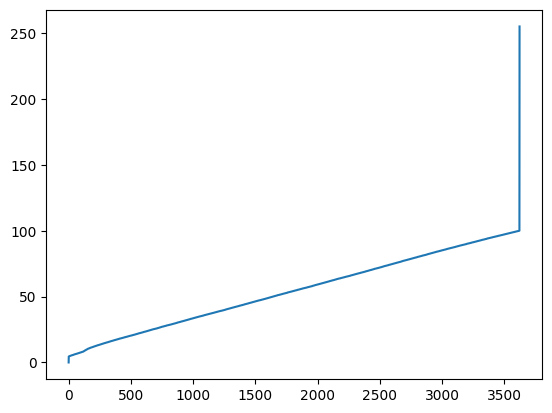

In [55]:
y = np.sort(df['avg_density'].unique())
x = np.array(range(len(y)))

fig, ax = plt.subplots()
ax.plot(y)
plt.show()

In [37]:
sample = df.sample()
print(rec_area_density_report(sample.latitude.iloc[0], sample.longitude.iloc[0],dfdll,0.02))
print(sample.avg_density.iloc[0])
result[result['uuid'] == sample.uuid.iloc[0]]

0.0
0.0


,latitude_left,longitude_left,density,geometry,index_right,latitude_right,longitude_right,uuid,botanical_genus,German_genus,...,trunk_diameter,trunk_circumference,crown_diameter,tree_sponsorship,botanical_species_formal_name,botanical_species_common_name,min_lat,max_lat,min_lon,max_lon
10265716,54.108693,12.078695,0,POINT (12.07869 54.10869),56343,54.108596,12.078752,df940fbe-e9d2-4262-af11-7ef1a850604d,Liquidambar,Amberbaum,...,5.0,15.71,2.0,0,Liquidambar styraciflua,None,54.108416,54.108775,12.078568,12.078935
10265717,54.108691,12.078847,0,POINT (12.07885 54.10869),56343,54.108596,12.078752,df940fbe-e9d2-4262-af11-7ef1a850604d,Liquidambar,Amberbaum,...,5.0,15.71,2.0,0,Liquidambar styraciflua,None,54.108416,54.108775,12.078568,12.078935
10269399,54.108604,12.078690,0,POINT (12.07869 54.1086),56343,54.108596,12.078752,df940fbe-e9d2-4262-af11-7ef1a850604d,Liquidambar,Amberbaum,...,5.0,15.71,2.0,0,Liquidambar styraciflua,None,54.108416,54.108775,12.078568,12.078935
10269400,54.108601,12.078843,0,POINT (12.07884 54.1086),56343,54.108596,12.078752,df940fbe-e9d2-4262-af11-7ef1a850604d,Liquidambar,Amberbaum,...,5.0,15.71,2.0,0,Liquidambar styraciflua,None,54.108416,54.108775,12.078568,12.078935
10273082,54.108514,12.078686,0,POINT (12.07869 54.10851),56343,54.108596,12.078752,df940fbe-e9d2-4262-af11-7ef1a850604d,Liquidambar,Amberbaum,...,5.0,15.71,2.0,0,Liquidambar styraciflua,None,54.108416,54.108775,12.078568,12.078935
10273083,54.108511,12.078838,0,POINT (12.07884 54.10851),56343,54.108596,12.078752,df940fbe-e9d2-4262-af11-7ef1a850604d,Liquidambar,Amberbaum,...,5.0,15.71,2.0,0,Liquidambar styraciflua,None,54.108416,54.108775,12.078568,12.078935
10276765,54.108424,12.078681,0,POINT (12.07868 54.10842),56343,54.108596,12.078752,df940fbe-e9d2-4262-af11-7ef1a850604d,Liquidambar,Amberbaum,...,5.0,15.71,2.0,0,Liquidambar styraciflua,None,54.108416,54.108775,12.078568,12.078935
10276766,54.108421,12.078834,0,POINT (12.07883 54.10842),56343,54.108596,12.078752,df940fbe-e9d2-4262-af11-7ef1a850604d,Liquidambar,Amberbaum,...,5.0,15.71,2.0,0,Liquidambar styraciflua,None,54.108416,54.108775,12.078568,12.078935


In [38]:
result.shape

(683712, 24)

In [39]:
df.columns

Index(['latitude', 'longitude', 'uuid', 'botanical_genus', 'German_genus',
       'botanical_species', 'German-species', 'avenue_tree', 'height',
       'trunk_diameter', 'trunk_circumference', 'crown_diameter',
       'tree_sponsorship', 'botanical_species_formal_name',
       'botanical_species_common_name', 'min_lat', 'max_lat', 'min_lon',
       'max_lon', 'avg_density'],
      dtype='object')

## Improved rigor of matching different Geospatial data

In [43]:
def geotif_native_extract(path_tiff, lonmin, latmin, lonmax, latmax):
    import rasterio
    import rasterio.warp
    import numpy as np
    import pandas as pd
    import geopandas as gpd
    from rasterio.windows import from_bounds
    from rasterio.warp import transform_bounds

    with rasterio.open(path_tiff) as src:
        # 1. Identity the CRS (The "Truth")
        native_crs = src.crs
        
        # 2. Convert your Lat/Lon search window to the Native CRS
        left, bottom, right, top = transform_bounds('EPSG:4326', native_crs, lonmin, latmin, lonmax, latmax)
        
        # 3. Read the window
        window = from_bounds(left, bottom, right, top, transform=src.transform)
        data = src.read(1, window=window, boundless=True, fill_value=0)
        win_transform = src.window_transform(window)

        # 4. Get pixel coordinates in Native Projected Units (Meters)
        height, width = data.shape
        cols, rows = np.meshgrid(np.arange(width), np.arange(height))
        xs, ys = rasterio.transform.xy(win_transform, rows, cols)
        
        # 5. Flatten and create a GeoDataFrame immediately
        # We stay in the native CRS - NO warping to Lat/Lon here!
        densities = data.flatten()
        mask = densities >= 0  # Use >=0 to include 0% tree cover areas

        df_density = pd.DataFrame({
            'x': np.array(xs).flatten()[mask],
            'y': np.array(ys).flatten()[mask],
            'density': densities[mask]
        })

        gdf_density = gpd.GeoDataFrame(
            df_density, 
            geometry=gpd.points_from_xy(df_density.x, df_density.y),
            crs=native_crs
        )

        # 6. Save as Parquet (GeoPandas version)
        gdf_density.to_parquet('../data/density_native.parquet')
        
        print(f"Exported {len(gdf_density)} pixels in {native_crs}.")
        return gdf_density, native_crs

### Extract the projected meters data from the geotiff while maintaining the ESPG:3035 CRS (Coordinate Reference System)

In [72]:
dfdensity, crs = geotif_native_extract(path_tiff, lonmin, latmin, lonmax, latmax)

Exported 18731738 pixels in EPSG:3035.


In [73]:
dfdensity.density.unique()

array([255,   0,  65,  73,  85,  96,  95,  98,  97,  92,  90,  87,  63,
        69,  71,  79,  82,  94,  99,  77,  61,  60,  66,  68,  84,  58,
       100,  83,  75,  67,  91,  62,  72,  81,  93,  88,  78,  59,  89,
        57,  74,  70,  76,  64,  86,  80,  56,  55,  54,  52,  50,  47,
        53,  49,  48,  51], dtype=uint8)

### Filter density data base on FAO Definition that Copernicus adhers to:
2. The "0 to 47" Gap (The Definition of "Forest")
The reason you don't see values like 5%, 10%, or 20% is due to the FAO (Food and Agriculture Organization) definition of Forest that Copernicus adheres to.

Copernicus Tree Cover Density often applies a thresholding logic:

0: Represents "Non-tree covered area" (water, urban, bare soil).

1-100: Represents the percentage of tree cover.

The Gap: Many of these HRL (High Resolution Layer) products are specifically designed to map areas with at least 10% or higher canopy cover. However, the specific "Forest" product you are using often shows a steep drop-off because pixels with very low tree counts (like a single tree in a parking lot) are often re-classified to 0 to reduce "noise" in the forest dataset.

In [74]:
dfdensity.shape

(18731738, 4)

In [75]:
mask = (dfdensity['density'] >=0) & (dfdensity['density'] <=100)
dfdensity = dfdensity[mask]
dfdensity.shape

(13661047, 4)

In [77]:
np.sort(dfdensity.density.unique())

array([  0,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100], dtype=uint8)

In [78]:
# 1. Convert your 70k points to a GeoDataFrame (Initially as 4326/WGS84)
gdf_targets = gpd.GeoDataFrame(
    df, 
    geometry=gpd.points_from_xy(df.longitude, df.latitude),
    crs="EPSG:4326"
)

# 2. Re-project to match the 3035 Density Data
# This ensures the buffer is calculated in METERS
gdf_targets = gdf_targets.to_crs("EPSG:3035")

# 3. Create the Circular Buffer
# radius=25 means a 50m diameter circle around each point
radius = 25
gdf_targets['geometry'] = gdf_targets.geometry.buffer(radius)

# 4. Perform the Join
# We find all 10m pixels (from your 18M set) that fall INSIDE the 25m circles
# 'dfdensity' is the result from your previous function
joined = gpd.sjoin(dfdensity, gdf_targets, how='inner', predicate='within')

# 5. Calculate the statistics
stats = joined.groupby('index_right')['density'].agg(['mean', 'count'])

# 6. Map back to the original 70k dataframe
df['avg_tree_density'] = df.index.map(stats['mean']).fillna(0)
df['pixel_count'] = df.index.map(stats['count']).fillna(0)

print(f"Analysis complete. Average pixels per circle: {df['pixel_count'].mean():.2f}")

Analysis complete. Average pixels per circle: 19.61


In [79]:
print(f"Analysis complete. Average pixels per circle: {df['pixel_count'].mean():.2f}")
print(f"Analysis complete. min pixels per circle: {df['pixel_count'].min():.2f}")
print(f"Analysis complete. max pixels per circle: {df['pixel_count'].max():.2f}")

Analysis complete. Average pixels per circle: 19.61
Analysis complete. min pixels per circle: 0.00
Analysis complete. max pixels per circle: 21.00


Methodology Statement for your paper:

"To quantify local tree cover, we performed a spatial overlay between the target observations and the 10m Copernicus Tree Cover Density (2023) raster. Both datasets were processed in the ETRS89-LAEA projection (EPSG:3035) to ensure equidistant measurements. Each target point was buffered by a 25m radius, and the mean density of all raster pixel centroids falling within this geodesic circle was recorded."

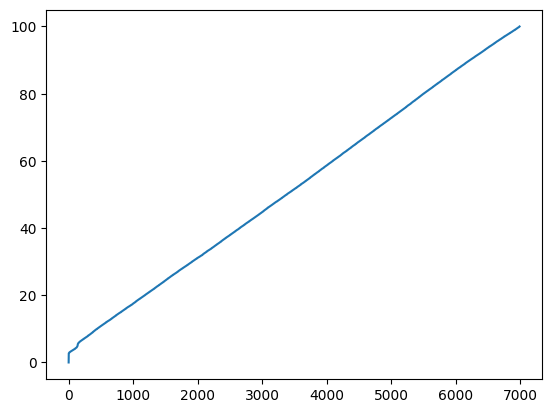

In [82]:
y = np.sort(df['avg_tree_density'].unique())
x = np.array(range(len(y)))

fig, ax = plt.subplots()
ax.plot(y)
plt.show()

In [84]:
len(df.avg_tree_density.unique())

6990

The Methodology Explanation for the "Gap":
In your write-up, you can explain the distribution like this:

"The Tree Cover Density (TCD) values follow the Copernicus HRL specifications, where values 0-100 represent canopy cover percentage and 255 represents NoData/Masked areas. The observed scarcity of values between 1 and 47 in this specific region is consistent with the product's high-pass filtering, which prioritizes the identification of established tree cover over isolated or ornamental vegetation."